In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

C:\Users\Jamal Arshad\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('datasets/book_reviews_sample.csv')
df.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [4]:
df['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [5]:
# lowercase
df['lower'] = df['reviewText'].str.lower()
df.head()

,index,reviewText,rating,lower
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [6]:
# remove punctuation
df['lower'] = df.apply(lambda x: re.sub(r"([^\w\s])", "", x['lower']), axis=1)
df.head()

,index,reviewText,rating,lower
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [7]:
vader = SentimentIntensityAnalyzer()

In [8]:
df['vader'] = df['lower'].apply(lambda review:  vader.polarity_scores(review)['compound'])
df.head()

,index,reviewText,rating,lower,vader
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [9]:
bins = [-1, -0.1, 0, 1]
names = ['negative', 'neutral', 'positive']
df['vader_label'] = pd.cut(df['vader'], bins, labels=names)
df.head()

,index,reviewText,rating,lower,vader,vader_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_label'>

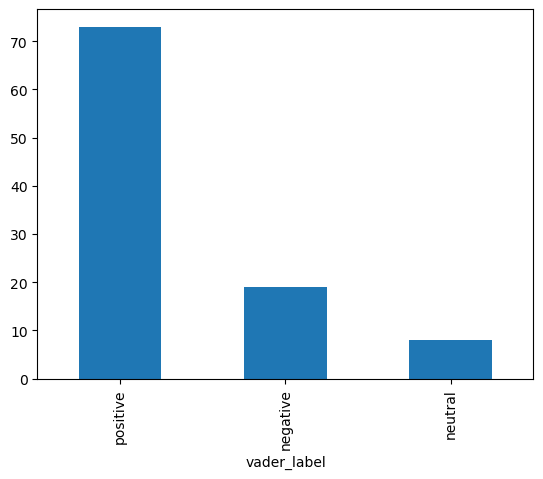

In [10]:
df['vader_label'].value_counts().plot.bar()

In [1]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer("english", True)
text = "There is nothing either good or bad but thinking makes it so."
words = word_tokenize(text)
stemmed_words = [stemmer.stem(word) for word in words]

print("Original:", text)
print("Tokenized:", words)
print("Stemmed:", stemmed_words)

Original: There is nothing either good or bad but thinking makes it so.
Tokenized: ['There', 'is', 'nothing', 'either', 'good', 'or', 'bad', 'but', 'thinking', 'makes', 'it', 'so', '.']
Stemmed: ['there', 'is', 'noth', 'either', 'good', 'or', 'bad', 'but', 'think', 'make', 'it', 'so', '.']
